#**Name: Nader Mohamed Elhadedy**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# helping libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read input dataset
cols = ["sepal length", "sepal width", "petal length", "petal width", "class"]

df = pd.read_csv("iris.data", names=cols)

#**- Inspecting the dataset**

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

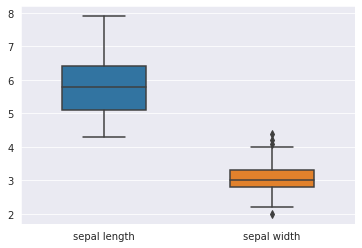

In [ ]:
sns.set_style('darkgrid')
_ = sns.boxplot(data=df[['sepal length', 'sepal width']], width=0.5)

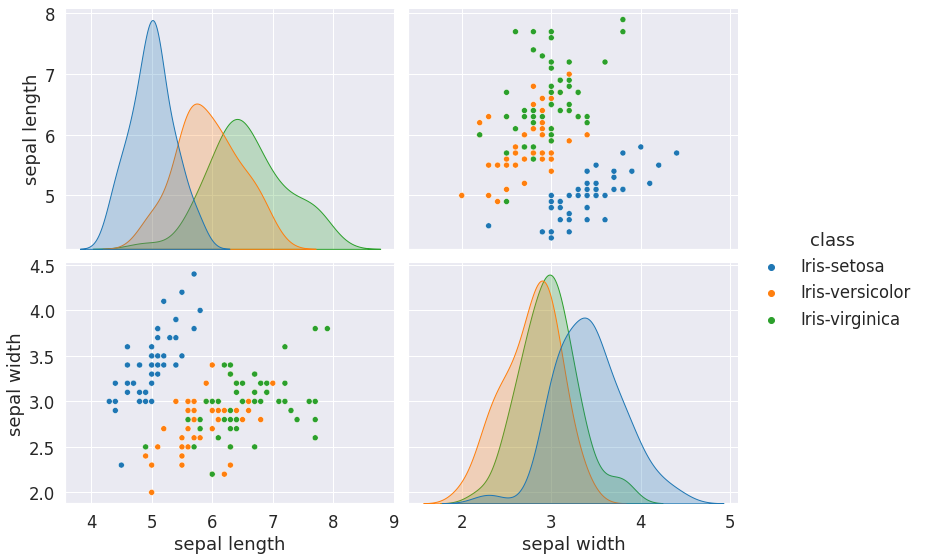

In [ ]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
_ = sns.pairplot(df[['sepal length',	'sepal width', 'class']], hue='class', height=4, aspect=4/3)

In [ ]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [ ]:
X = df[['sepal length', 'sepal width']]
y = df['class']

y = pd.factorize(y)[0]

<hr>

#**- Implementing classification models**

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
x1 = X.iloc[:,0]
x2 = X.iloc[:,1]

In [ ]:
df_test = pd.DataFrame(data = np.c_[x1,x2,y], columns=['x1','x2','class'])

# **- Visualizing the used features with supposed classes to be classified**

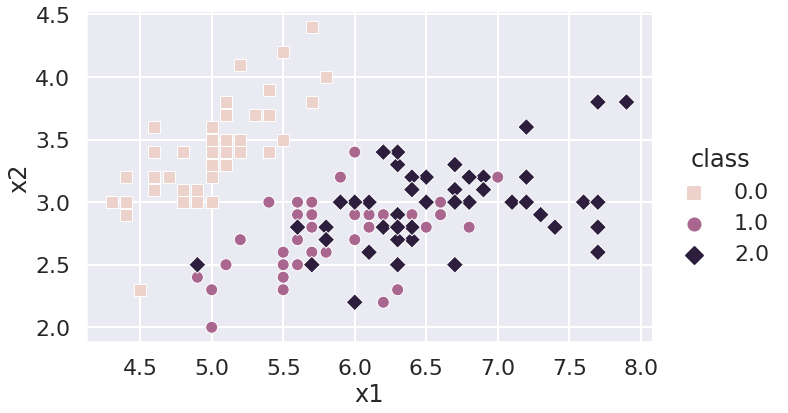

In [ ]:
sns.set_theme(context='poster')
ax = sns.pairplot(data=df_test, x_vars=['x1'], y_vars=["x2"], height=6, aspect=8/5, hue='class', markers=["s", "o", "D"])

# **- Creating functions to draw the decision surface**

In [ ]:
def make_grid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    x_s, y_s = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return x_s, y_s

In [ ]:
def draw_surface(x1, x2, y, model, model_name):
  from matplotlib import rcParams
  rcParams['axes.titlepad'] = 30 
  x_s, y_s = make_grid(x1, x2)
  z = model.predict(np.c_[x_s.ravel(), y_s.ravel()]).reshape(x_s.shape)
  _ = plt.figure(figsize=(10,6))
  plt.contourf(x_s, y_s, z, cmap=plt.cm.Dark2_r, alpha=0.3)
  plt.scatter(x1, x2, c=y, cmap=plt.cm.Dark2_r, marker='x')
  plt.xlim(x_s.min(), x_s.max())
  plt.ylim(y_s.min(), y_s.max())
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.title(f'Decision surface for {model_name} model')
  plt.show()

<hr>

# **Model 1: Linear SVC**

In [ ]:
model_1 = LinearSVC(C=10, random_state=0, max_iter=1000)

In [ ]:
model_1.fit(X_train, y_train)

print("Train Score:", model_1.score(X_train, y_train))
print("Test Score:", model_1.score(X_test, y_test))

Train Score: 0.8555555555555555
Test Score: 0.7166666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


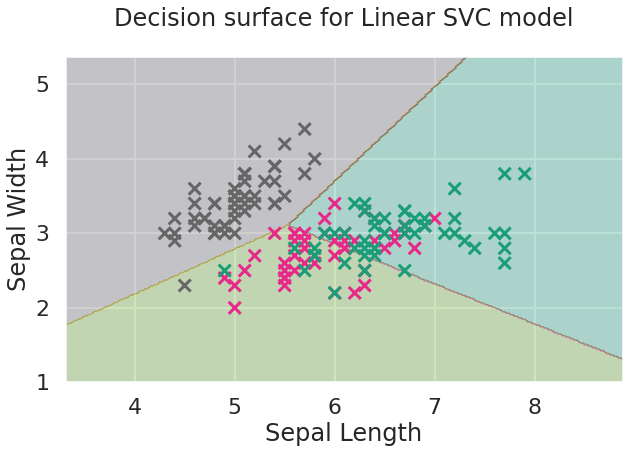

In [ ]:
draw_surface(x1, x2, y, model_1, "Linear SVC")

<hr>

# **Model 2: SVC {kernel: linear}**

In [ ]:
model_2 = SVC(C=10, kernel='linear')

In [ ]:
model_2.fit(X_train, y_train)

print("Train Score:", model_2.score(X_train, y_train))
print("Test Score:", model_2.score(X_test, y_test))

Train Score: 0.8555555555555555
Test Score: 0.7166666666666667


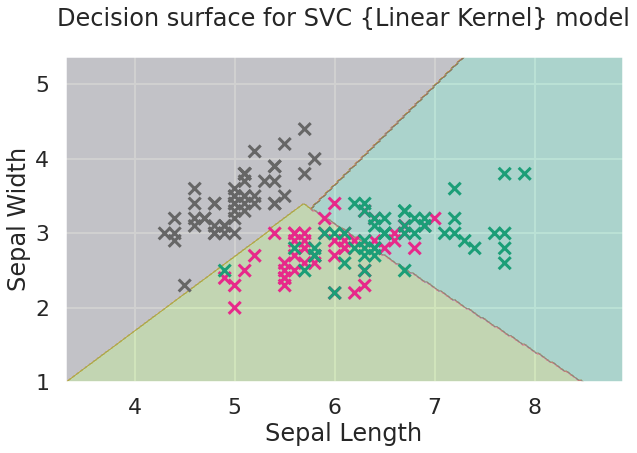

In [ ]:
draw_surface(x1, x2, y, model_2, "SVC {Linear Kernel}")

<hr>

# **Model 3: SVC {kernel: poly}**

In [ ]:
# finding best degree
for d in np.linspace(1,10,10):
  model_3 = SVC(C=10, kernel='poly', degree=d)
  model_3.fit(X_train, y_train)
  print(f"Degree= {round(d,3)} : Score= {round(model_3.score(X_test, y_test),4)}")

Degree= 1.0 : Score= 0.7
Degree= 2.0 : Score= 0.7167
Degree= 3.0 : Score= 0.7167
Degree= 4.0 : Score= 0.7
Degree= 5.0 : Score= 0.7167
Degree= 6.0 : Score= 0.7333
Degree= 7.0 : Score= 0.7833
Degree= 8.0 : Score= 0.7
Degree= 9.0 : Score= 0.75
Degree= 10.0 : Score= 0.6833


In [ ]:
model_3 = SVC(C=10, kernel='poly', degree=7)

In [ ]:
model_3.fit(X_train, y_train)

print("Train Score:", model_3.score(X_train, y_train))
print("Test Score:", model_3.score(X_test, y_test))

Train Score: 0.8111111111111111
Test Score: 0.7833333333333333


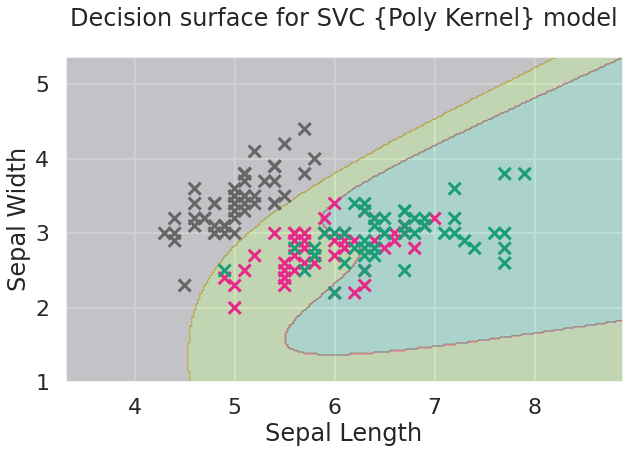

In [ ]:
draw_surface(x1, x2, y, model_3, "SVC {Poly Kernel}")

<hr>

# **Model 4: SVC {kernel: RBF}**

In [ ]:
# finding best gamma
for g in np.linspace(0.1,1,10):
  model_4 = SVC(C=10, kernel='rbf', gamma=g)
  model_4.fit(X_train, y_train)
  print(f"gamma= {round(g,3)} : Score={round(model_4.score(X_test, y_test),4)}")

gamma= 0.1 : Score=0.7167
gamma= 0.2 : Score=0.7167
gamma= 0.3 : Score=0.7167
gamma= 0.4 : Score=0.7167
gamma= 0.5 : Score=0.7167
gamma= 0.6 : Score=0.7333
gamma= 0.7 : Score=0.7333
gamma= 0.8 : Score=0.7333
gamma= 0.9 : Score=0.7333
gamma= 1.0 : Score=0.7167


In [ ]:
model_4 = SVC(C=10, kernel='rbf', gamma=0.8)

In [ ]:
model_4.fit(X_train, y_train)

print("Train Score:", model_4.score(X_train, y_train))
print("Test Score:", model_4.score(X_test, y_test))

Train Score: 0.8444444444444444
Test Score: 0.7333333333333333


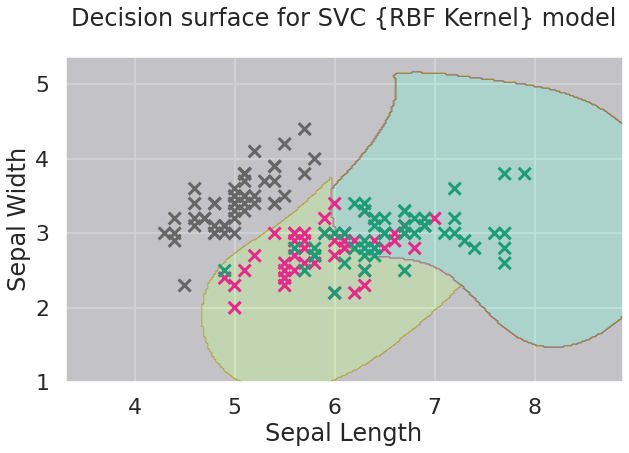

In [ ]:
draw_surface(x1, x2, y, model_4, "SVC {RBF Kernel}")

>## **Best test score found in `models 3 & 4` when used `svc model with poly and rbf kernel` which best classified the classes and embraced most class points in each contour but when tuned the hyperparameters.**

<hr>